In [2]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library import QFT
import numpy as np
import random as rd
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.primitives import StatevectorSampler, PrimitiveJob



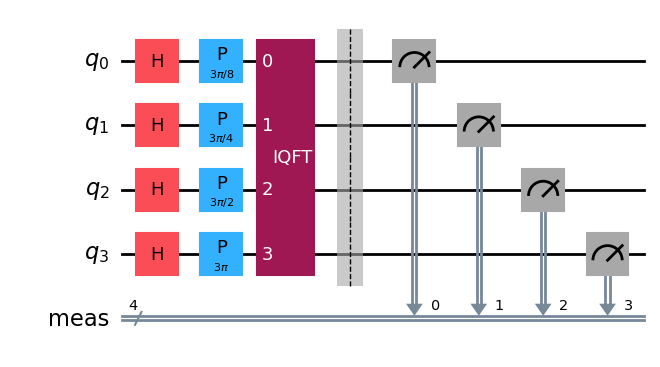

Média das medições fornecidas: 3.2249999999999996
Períodos detectados após QFT: [3]


In [3]:
medicoes = [3.0, 3.1, 3.5, 3.3]  #4 medições em segundos

num_qubits = len(medicoes) 
qc = QuantumCircuit(num_qubits)

for i in range (num_qubits):
    qc.h(i)
    theta = 2 * np.pi * medicoes[0] * ((2**i)/(2**num_qubits))
    qc.p(theta, i)

qc.append(QFT(num_qubits, inverse=True), range(num_qubits))

qc.measure_all()
display(qc.draw('mpl'))

sampler = StatevectorSampler()
pub = (qc)
job_sampler = sampler.run([pub], shots=1024)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

periodos = []

for bitstring, count in counts_sampler.items():
    # Converter o bitstring para o valor numérico (período)
    value = int(bitstring, 2)
    # Adicionar o valor à lista de períodos
    periodos.append(value)

media_medicoes = np.mean(medicoes)
print(f'Média das medições fornecidas: {media_medicoes}')

# Exibir os períodos encontrados
print("Períodos detectados após QFT:", periodos)